## Extracting Keypoints or Landmarks to create custom Dataset using MediaPipe

#### 1. Install and Import all the Required Libraries

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [12]:
from Extracting_Landmarks import extract_keypoints

In [2]:
import mediapipe as mp
print(mp.__version__)

0.10.14


In [3]:
import cv2 
import numpy as np 
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

### 2. Capturing Keypoints using MP Holistic

In [4]:
# using MediaPipe holistic

#Importing mediapipe holistic model to make landmark detection
mp_holistic = mp.solutions.holistic 

#importing MediaPipe Drawing Utitlities to draw landmarks 
mp_drawing = mp.solutions.drawing_utils

In [5]:
#Defining mediapipe detection function 

def mediapipe_detection(image , model):
  
  image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
  image.flags.writeable = False   #making sure accidental changes to the image data is not made
  results = model.process(image)    # Make landmark predictions
  image.flags.writeable = True
  image = cv2.cvtColor(image , cv2.COLOR_RGB2BGR)

  return image , results

In [6]:
def drawing_landmarks(image , results):
 mp_drawing.draw_landmarks(image , results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
 mp_drawing.draw_landmarks(image , results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
 mp_drawing.draw_landmarks(image , results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
 mp_drawing.draw_landmarks(image , results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [7]:
def drawing_styled_landmarks(image , results):
 mp_drawing.draw_landmarks(image , results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
 mp_drawing.DrawingSpec(color=(80,110,10) , thickness= 1 , circle_radius=1),
 mp_drawing.DrawingSpec(color=(80,250,121) , thickness= 1 , circle_radius=1)
 )
 mp_drawing.draw_landmarks(image , results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
 mp_drawing.DrawingSpec(color=(80,22,10) , thickness= 2 , circle_radius=4),
 mp_drawing.DrawingSpec(color=(80,44,121) , thickness= 2 , circle_radius=2)
 )
 mp_drawing.draw_landmarks(image , results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
 mp_drawing.DrawingSpec(color=(80,22,10) , thickness= 2 , circle_radius=4),
 mp_drawing.DrawingSpec(color=(80,44,121) , thickness= 2 , circle_radius=2)
 )
 mp_drawing.draw_landmarks(image , results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
 mp_drawing.DrawingSpec(color=(80,117,10) , thickness= 2 , circle_radius=4),
 mp_drawing.DrawingSpec(color=(80,66,121) , thickness= 2 , circle_radius=2
 ))

In [8]:
# Checking video camera availablity 
 
cap = cv2.VideoCapture(0)  # accesses the webcam

with mp_holistic.Holistic(min_detection_confidence= 0.7 , min_tracking_confidence= 0.7) as holistic:
   while cap.isOpened():  #This loop continiously read frames from the camera cap

      # Reading the frames
      ret , frame = cap.read() # ret is a boolean variable that is True is a frame is being read

      # Using Detection Function

      image , landmark_results = mediapipe_detection(frame , holistic )
      print(landmark_results)

      #Drawing Landmarks onto the frames on the screen
      drawing_styled_landmarks(image , landmark_results)

      # Displaying frames to screen 
      cv2.imshow('OpenCV' , image) 

      if cv2.waitKey(10) & 0xFF == ord('q'):
         break
      
   cap.release()
   cv2.destroyAllWindows()

c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
# only represents for the last frame

if landmark_results.face_landmarks is None:
    print("Face landmarks not detected")

if landmark_results.left_hand_landmarks is None:
    print("Left hand landmarks not detected")

if landmark_results.right_hand_landmarks is None:
    print("Right hand landmarks not detected")


Left hand landmarks not detected
Right hand landmarks not detected


In [10]:
len(landmark_results.face_landmarks.landmark)

468

In [11]:
len(landmark_results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
drawing_landmarks(frame , landmark_results)

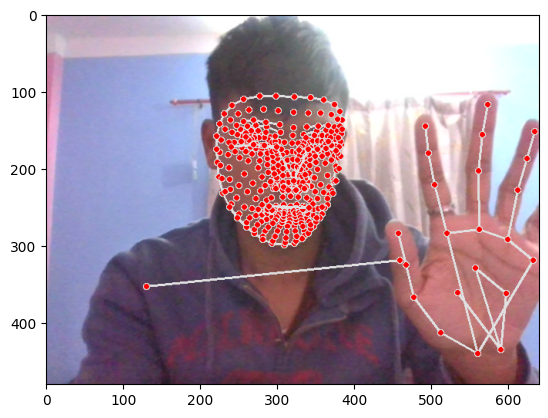

In [ ]:
#Visualizing Last frame

plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))

### 3. Extracting Keypoint Values

In [ ]:
len(landmark_results.pose_landmarks.landmark)

33

In [ ]:
landmark_results.pose_landmarks.landmark[0]

x: 0.668744266
y: 0.512132
z: -1.5171082
visibility: 0.999908626

In [ ]:
def extract_keypoints(results):

 pose = np.array([[point.x , point.y , point.z , point.visibility] for point in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)

 lh = np.array([[point.x , point.y , point.z] for point in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)

 rh = np.array([[point.x , point.y , point.z] for point in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)

 face = np.array([[point.x , point.y , point.z] for point in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)

 #Concatenating and returning to represent all the keypoints in a single array

 return np.concatenate([pose , face , lh, rh])

In [ ]:
extract_keypoints(landmark_results).shape

# Expected output = (1404 + 63 + 63 + 132) = 1662
# number of landmarks = 33 + 21 + 21 + 468 = 564

(1662,)